In [ ]:
import torch
import time
from snn_delays.experimental_models.snn_delay_prun import P_DelaySNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils import train, get_device
from snn_delays.utils.test_behavior import tb_save_max_acc
from snn_delays.utils.visualization_utils import training_plots

device = get_device()

# for reproducibility
torch.manual_seed(10)

'''
Remarks:
- experimenting with crop_to: this add different time-axis compression, should help with the generalization problem
'''

dataset = 'shd'
total_time = 50
batch_size = 1024


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Running on: cuda:0


With crop to: 

In [2]:
# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='gpu',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  crop_to=1e6)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[CropTime(min=0, max=1000000.0), ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
Initializing GPU cache for 8156 samples...
Cache initialized in 37.74 seconds
Initializing GPU cache for 2264 samples...
Cache initialized in 10.84 seconds


In [ ]:
num_epochs = 50

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'normal'
delay = (48,1)

snn = P_DelaySNN(dataset_dict=dataset_dict, structure=(64, 2), connection_type='f',
    delay=delay, delay_type='h', tau_m = tau_m, delay_mask='random', n_pruned_delays=3, 
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=False)

snn.set_network()
snn.to(device)
print(snn)
train(snn, train_loader, test_loader, lr, num_epochs, test_behavior=tb_save_max_acc, scheduler=(10, 0.95), test_every=1, freeze_taus = True)



[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
P_DelaySNN(
  (criterion): CrossEntropyLoss()
  (f0_f1): Linear(in_features=700, out_features=64, bias=False)
  (f1_f2): FixedMaskedLinear(
    (linear): Linear(in_features=3072, out_features=64, bias=False)
  )
  (f2_o): Linear(in_features=64, out_features=20, bias=False)
)
training shd50_l2_48d1.t7 for 50 epochs...
Epoch [1/50], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [2/7], Loss: 2.98843
l1_score: 0
Step [4/7], Loss: 2.96118
l1_score: 0
Step [6/7], Loss: 2.93787
l1_score: 0
Step [8/7], Loss: 2.89482
l1_score: 0
Time elasped: 2.470888376235962
Test Loss: 2.870628913243612
Avg spk_count per neuron for all 50 time-steps 3.5238101482391357
Avg spk per neuron per layer [12.093542954946997, 2.001697769434629]
Test Accuracy of the model on the test samples: 13.428

saving max acc: 13.42756183745583
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\checkpoint
Epoch [2/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 2.84914
l1_score: 0
Step [4/7], Loss: 2.81399
l1_score: 0
Step [6/7], Loss: 2.78899
l1_score: 0
Step [8/7], Loss: 2.74840
l1_score: 0
Time elasped: 2.3655436038970947
Test Loss: 2.652771552403768
Avg spk_count per neuron for all 50 time-steps 3.9509356021881104
Avg spk per neuron per layer [12.295301457597173, 3.5084405366607774]
Test Accuracy of the model on the test samples: 26.104

saving 

NameError: name 'training_plots' is not defined

<Axes: xlabel='Epoch'>

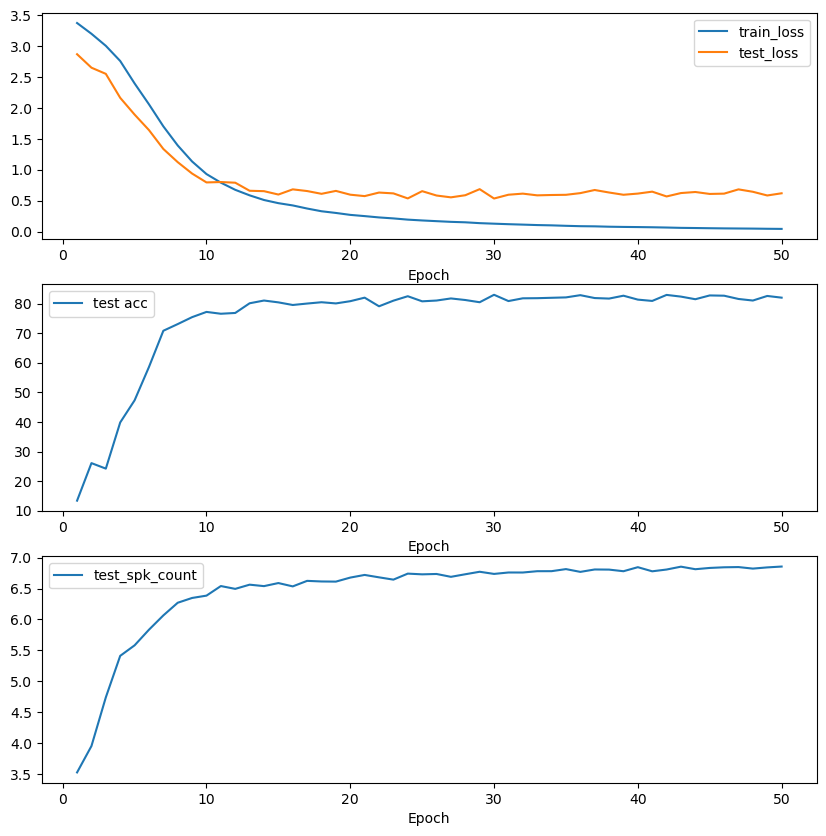

In [6]:
from snn_delays.utils.visualization_utils import training_plots
training_plots(snn)

Without crop to (better)

In [7]:
# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='gpu',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

[ToFrame(sensor_size=(700, 1, 1), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]
Initializing GPU cache for 8156 samples...
Cache initialized in 38.14 seconds
Initializing GPU cache for 2264 samples...
Cache initialized in 10.10 seconds



[INFO] Delays: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

[INFO] Delays i: tensor([0])

[INFO] Delays h: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47])

[INFO] Delays o: tensor([0])
1000.0
Delta t: 20.0 ms
mean of normal: -0.541324854612918
P_DelaySNN(
  (criterion): CrossEntropyLoss()
  (f0_f1): Linear(in_features=700, out_features=64, bias=False)
  (f1_f2): FixedMaskedLinear(
    (linear): Linear(in_features=3072, out_features=64, bias=False)
  )
  (f2_o): Linear(in_features=64, out_features=20, bias=False)
)
training shd50_l2_48d1.t7 for 50 epochs...
Epoch [1/50], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deepsnn\Lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [2/7], Loss: 2.98832
l1_score: 0
Step [4/7], Loss: 2.97560
l1_score: 0
Step [6/7], Loss: 2.93288
l1_score: 0
Step [8/7], Loss: 2.89620
l1_score: 0
Time elasped: 2.563074827194214
Test Loss: 2.814367135365804
Avg spk_count per neuron for all 50 time-steps 3.5958876609802246
Avg spk per neuron per layer [12.108415691254416, 2.275135269434629]
Test Accuracy of the model on the test samples: 13.825

saving max acc: 13.825088339222615
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\checkpoint
Epoch [2/50], learning_rates 0.001000, 0.100000
Step [2/7], Loss: 2.78395
l1_score: 0
Step [4/7], Loss: 2.70789
l1_score: 0
Step [6/7], Loss: 2.60510
l1_score: 0
Step [8/7], Loss: 2.47775
l1_score: 0
Time elasped: 2.2503488063812256
Test Loss: 2.3704516887664795
Avg spk_count per neuron for all 50 time-steps 4.712029933929443
Avg spk per neuron per layer [13.342908016784452, 5.505210633833922]
Test Accuracy of the model on the test samples: 25.883

saving 

<Axes: xlabel='Epoch'>

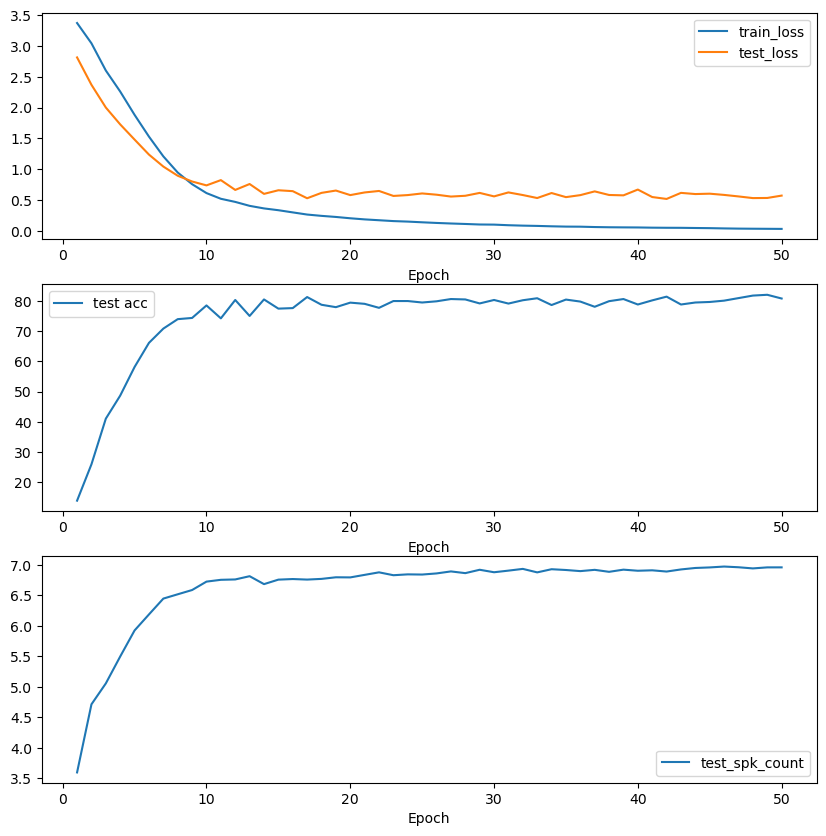

In [9]:
num_epochs = 50

lr = 1e-3
# SNN CON DELAYS
taimu1 = time.time()

tau_m = 'normal'
delay = (48,1)

snn = P_DelaySNN(dataset_dict=dataset_dict, structure=(64, 2), connection_type='f',
    delay=delay, delay_type='h', tau_m = tau_m, delay_mask='random', n_pruned_delays=3, 
    win=total_time, loss_fn='mem_sum', batch_size=batch_size, device=device,
    debug=False)

dataset_dict['time_ms'] = 1e3

snn.set_network()
snn.to(device)
print(snn)
train(snn, train_loader, test_loader, lr, num_epochs, test_behavior=tb_save_max_acc, scheduler=(10, 0.95), test_every=1, freeze_taus = True)
training_plots(snn)